In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tuesday Jan 30 17:27:07 2024

@author: Ruth Mvula

"""

Analyzing accuracy


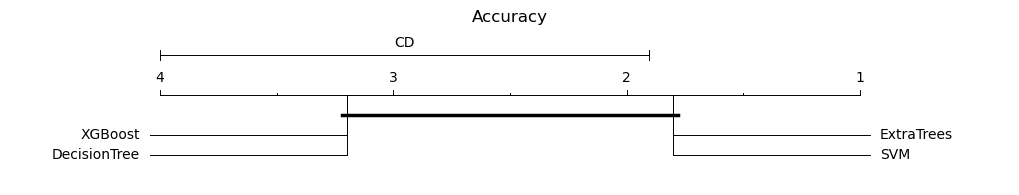

Friedman Test: Q=5.8799999999999955, p=0.11759670163860884
Critical Difference: 2.097605844293918

Analyzing precision


<Figure size 640x480 with 0 Axes>

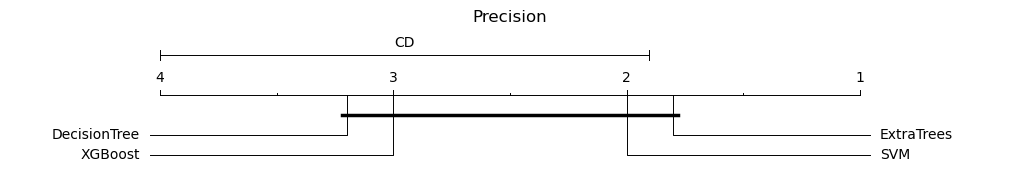

Friedman Test: Q=4.439999999999998, p=0.21770499602596577
Critical Difference: 2.097605844293918

Analyzing recall


<Figure size 640x480 with 0 Axes>

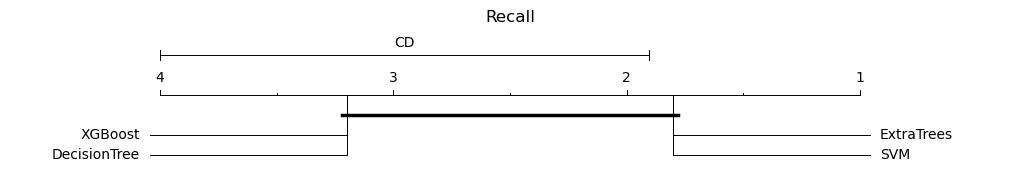

Friedman Test: Q=5.8799999999999955, p=0.11759670163860884
Critical Difference: 2.097605844293918

Analyzing f1


<Figure size 640x480 with 0 Axes>

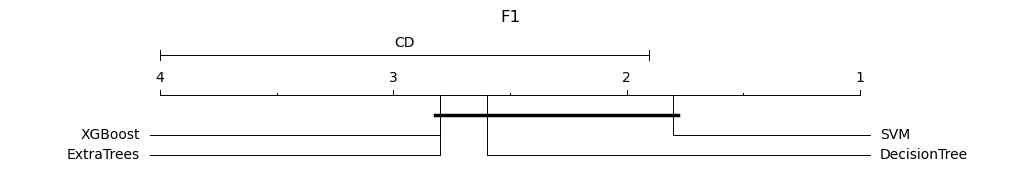

Friedman Test: Q=2.039999999999992, p=0.5641461991984618
Critical Difference: 2.097605844293918

Analyzing gmean


<Figure size 640x480 with 0 Axes>

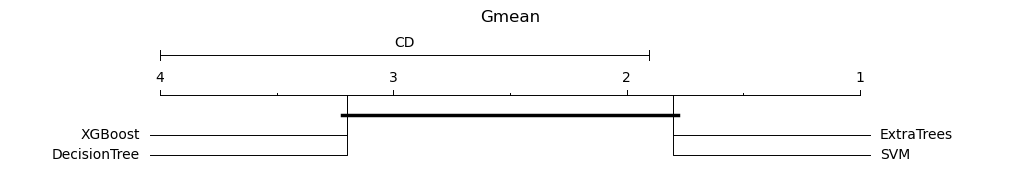

Friedman Test: Q=5.8799999999999955, p=0.11759670163860884
Critical Difference: 2.097605844293918

Analyzing aucs


<Figure size 640x480 with 0 Axes>

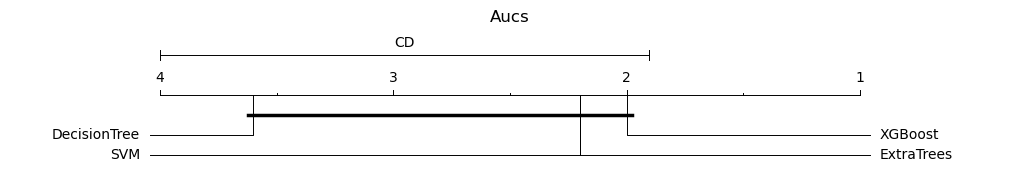

Friedman Test: Q=4.920000000000002, p=0.17774974398191584
Critical Difference: 2.097605844293918



<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
from scipy import stats
import Orange
import matplotlib.pyplot as plt

# Function to perform statistical analysis and plot CD diagram
def getstats(data, cols, n, name=''):
    q, p = stats.friedmanchisquare(*data)
    df = pd.DataFrame(data).T
    av_ranks = df.rank(ascending=False, axis=1).mean()
    cd = Orange.evaluation.compute_CD(av_ranks, n, alpha='0.05', test='nemenyi')
    Orange.evaluation.graph_ranks(av_ranks, cols, cd=cd, width=10, textspace=1.5, reverse=True)
    plt.title(f'{name.capitalize()}')
    plt.show()
    if name:
        plt.savefig(f'{name}.pdf')
    return q, p, cd

PATH = "Performance Metrics/"
# Read the CSV files
files = ["DecisionTree_performance_metrics.csv", "ExtraTrees_performance_metrics.csv",
         "SVM_performance_metrics.csv", "XGBoost_performance_metrics.csv"]
models = ['DecisionTree', 'ExtraTrees', 'SVM', 'XGBoost']
dataframes = [pd.read_csv(PATH + file) for file in files]

# Number of folds (assuming equal for all models)
n = dataframes[0].shape[0]

# Metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'gmean', 'aucs']

# Perform analysis for each metric
for metric in metrics:
    metric_data = [df[metric].values for df in dataframes]
    print(f"Analyzing {metric}")
    q, p, cd = getstats(metric_data, models, n, name=metric)
    print(f"Friedman Test: Q={q}, p={p}")
    print(f"Critical Difference: {cd}\n")


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


# Assuming the data is in the format of a list of lists
# Each sublist contains the fold-wise metrics for accuracy, precision, recall, f1, gmean, and aucs
def read_draw(str):
    df = pd.read_csv(str)
    # df = df.iloc[:-1, :]
    # df = df.drop(df.columns[0], axis=1)
    # Plotting each metric across folds
    plt.figure(figsize=(12, 6))
    line_styles = ["-", "--", "-.", ":"]
    for i, column in enumerate(df.columns):
        jittered_values = df[column] + np.random.normal(0, 0.001, len(df))
        plt.plot(
            df.index + 1,
            jittered_values,
            marker="o",
            linestyle=line_styles[i % len(line_styles)],
            label=column,
        )

        # plt.plot(df.index + 1, df[column], marker="o", label=column)

    # plt.title('Fig. Sensitivity Analysis of XGBoost Model')
    plt.xlabel("Fold")
    plt.ylabel("Metric Value")
    plt.xticks(df.index + 1)  # Set x-ticks to fold numbers
    plt.legend(title="Metrics")
    plt.grid(True)
    plt.show()

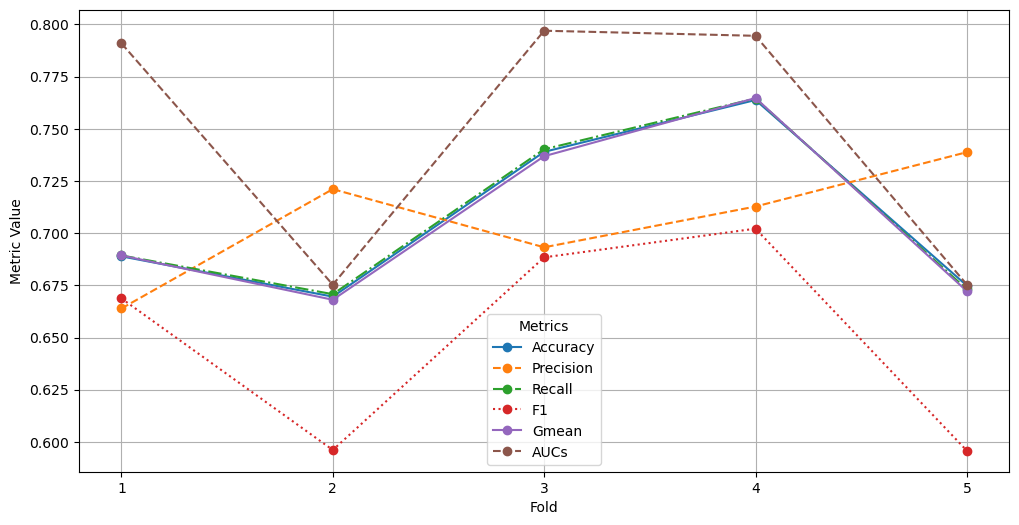

In [2]:
read_draw("Performance Metrics/XGBoost_performance_metrics.csv")

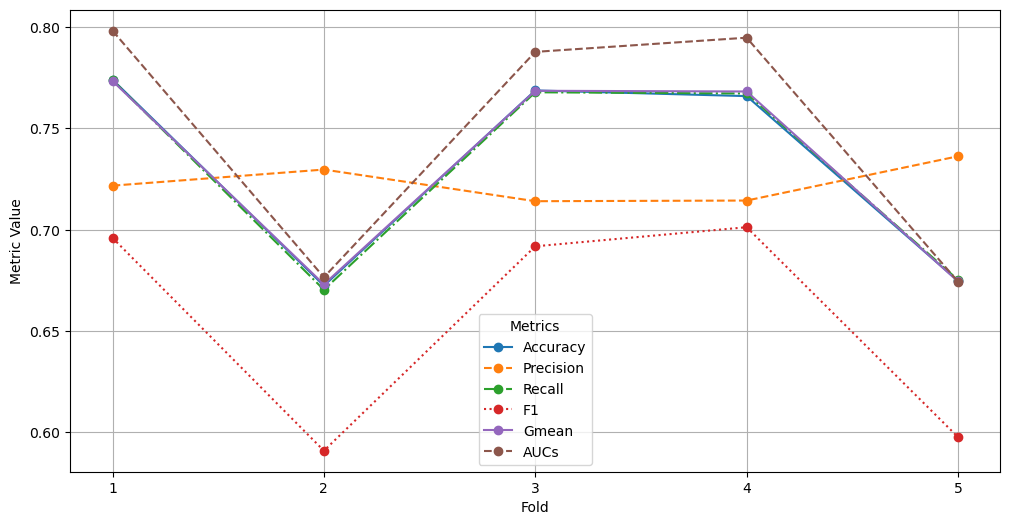

In [3]:
read_draw("Performance Metrics/SVM_performance_metrics.csv")

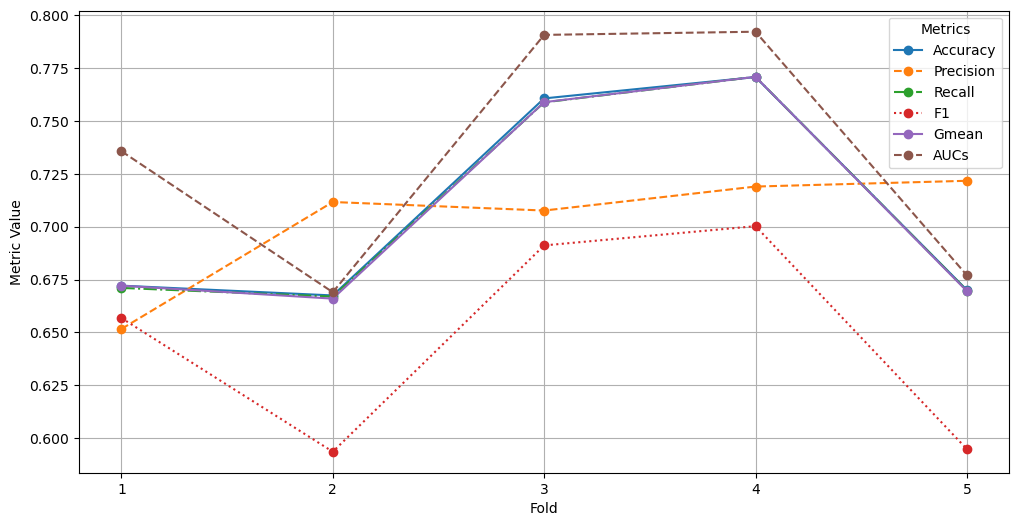

In [4]:
read_draw("Performance Metrics/DecisionTree_performance_metrics.csv")

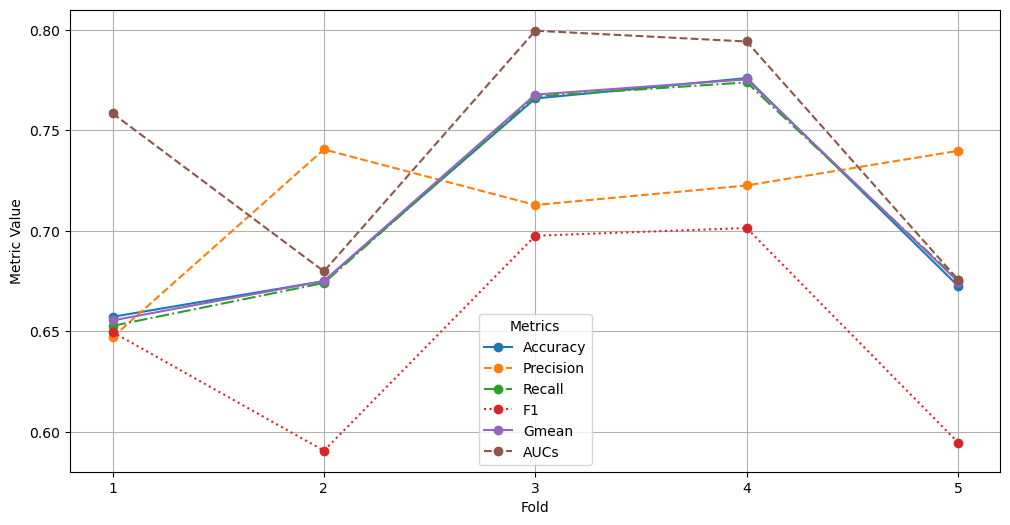

In [5]:
read_draw("Performance Metrics/ExtraTrees_performance_metrics.csv")

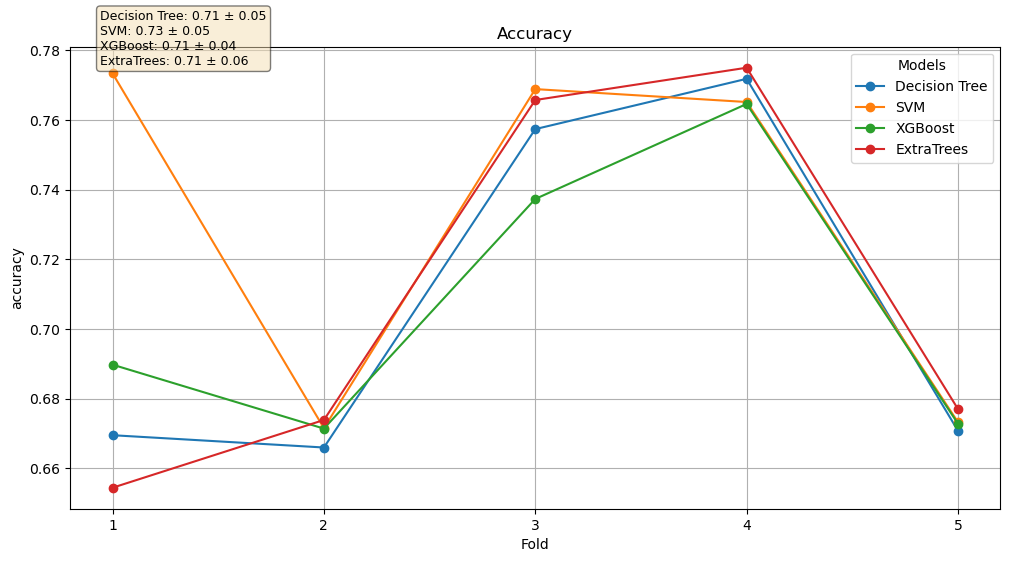

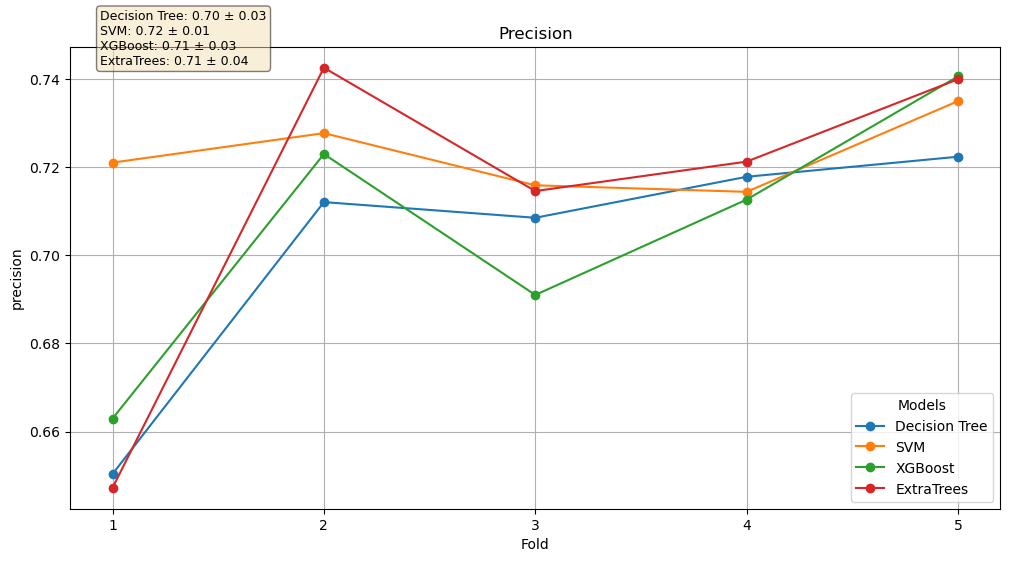

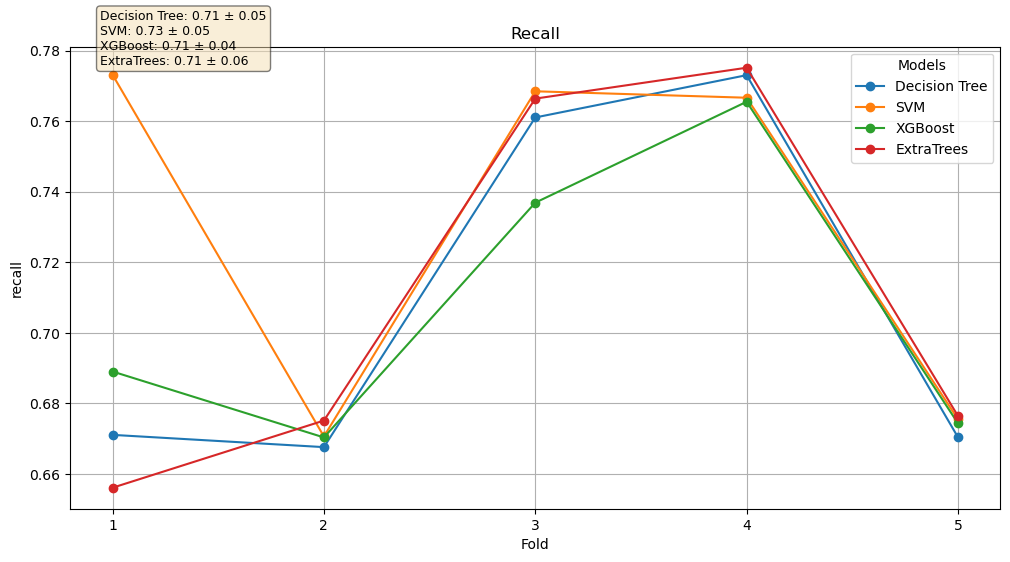

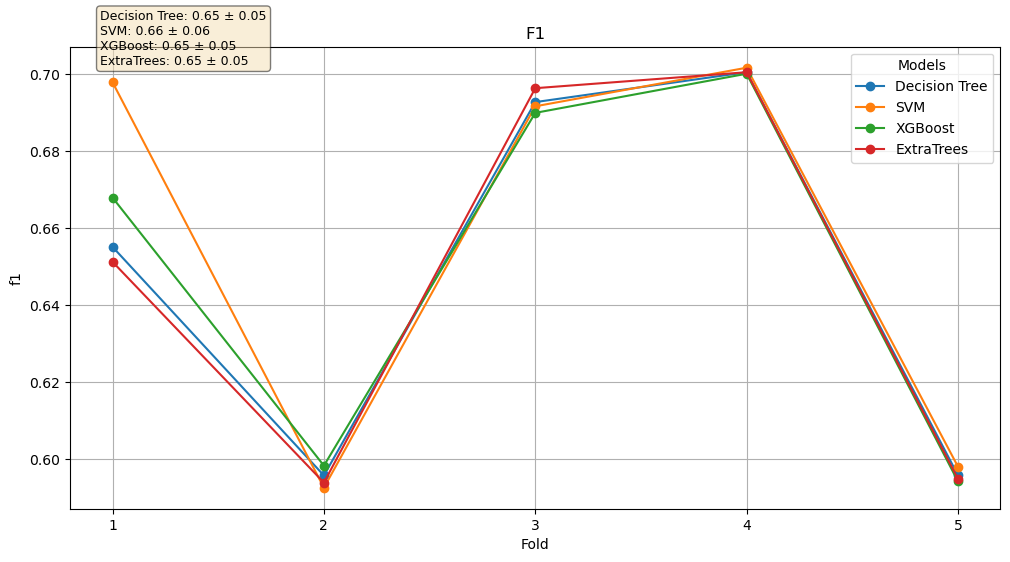

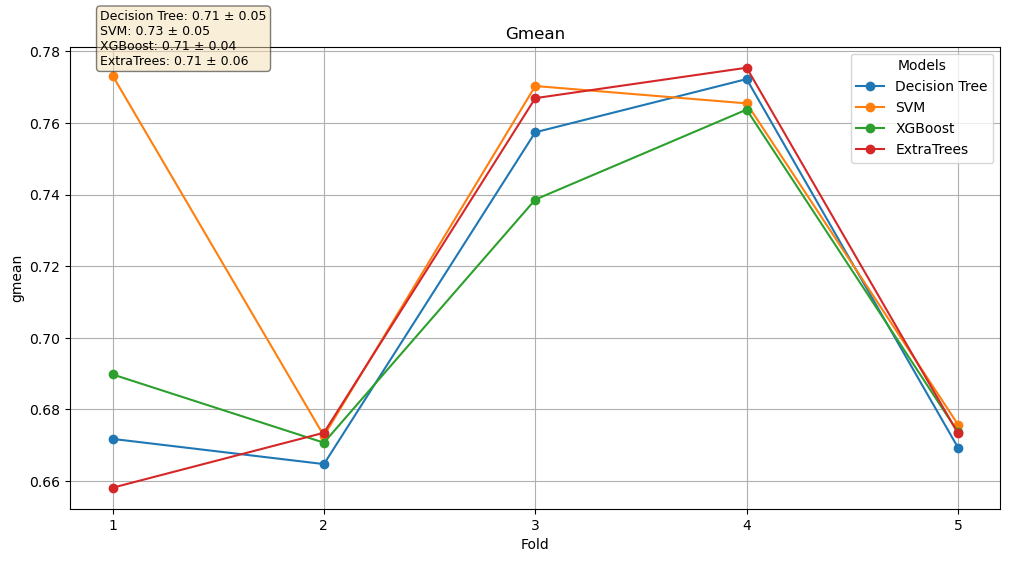

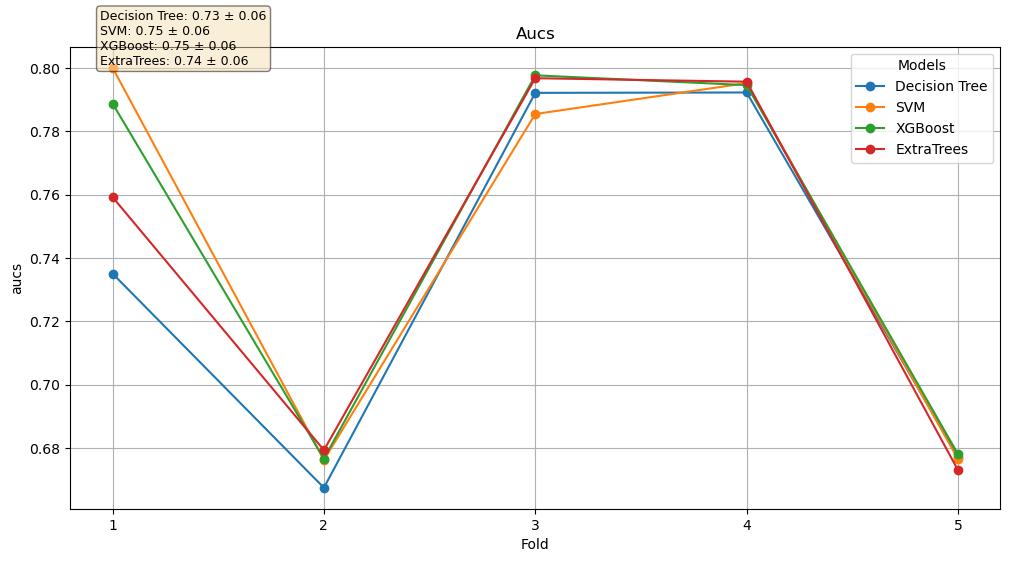

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def read_draw(files):
    # Initialize a dictionary to store data from each model
    models_data = {}

    # Read each file and store data in the dictionary
    for model_name, file_path in files.items():
        df = pd.read_csv(file_path)
        models_data[model_name] = df

    # Assuming all models have the same metrics
    metrics = models_data[next(iter(models_data))].columns

    # Plotting each metric across models
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        mean_values = []
        for model_name, df in models_data.items():
            jittered_values = df[metric] + np.random.normal(0, 0.001, len(df))
            plt.plot(df.index + 1, jittered_values, marker="o", label=model_name)

            # Calculate mean and store it for later use
            mean_value = df[metric].mean()
            std = df[metric].std()
            mean_values.append(f"{model_name}: {mean_value:.2f} ± {std:.2f}")

        plt.xlabel("Fold")
        plt.ylabel(metric)
        plt.xticks(df.index + 1)
        plt.title(f"{metric.capitalize()}")

        # Create a text box for mean values
        textstr = "\n".join(mean_values)
        plt.gcf().text(
            0.15,
            0.85,
            textstr,
            fontsize=9,
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
        )

        plt.legend(title="Models")
        plt.grid(True)
        plt.show()


# Dictionary of model names and their corresponding file paths
files = {
    "Decision Tree": "DecisionTree_performance_metrics.csv",
    "SVM": "SVM_performance_metrics.csv",
    "XGBoost": "XGBoost_performance_metrics.csv",
    "ExtraTrees": "ExtraTrees_performance_metrics.csv",
}

read_draw(files)